In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import Audio
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import rfft, rfftfreq
from scipy.signal import stft
import librosa
import meltysynth as ms


In [19]:
# y, sr = librosa.load('autre_data/piano.mp3', sr=None, duration=None)  # y is the time series, sr is the sampling rate
y, sr = librosa.load('simple_piano/anniversary-song-glen-miller-waltz-piano-level-6.wav', sr=None, duration=None)  # y is the time series, sr is the sampling rate
Audio(y, rate=sr)

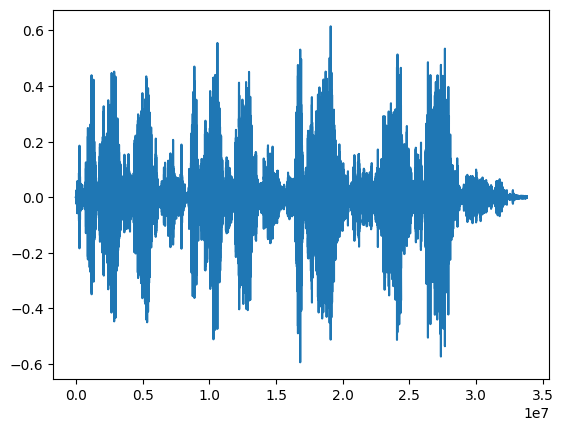

In [9]:
plt.plot(y)

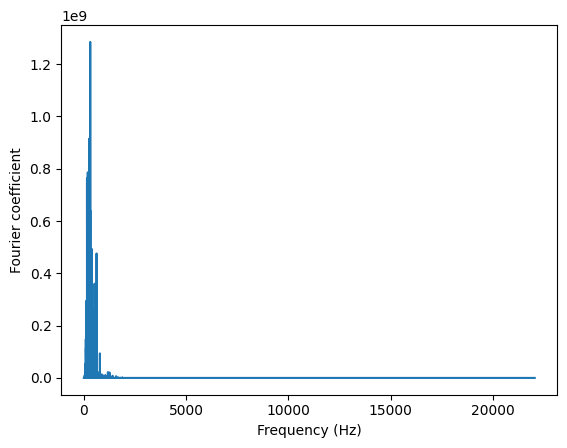

In [10]:
fourier = abs(rfft(y)) ** 2
freqs = rfftfreq(n=len(y), d=1.0 / sr)

fig, ax = plt.subplots()
ax.plot(freqs, fourier)
ax.set_xlabel("Frequency (Hz)")
_ = ax.set_ylabel("Fourier coefficient")

In [ ]:
f, t, Zxx = stft(y, fs=sr, nperseg=1000, noverlap=800)
fig, ax = plt.subplots()
ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, shading="gouraud")
ax.set_xlabel("Time (s)")
_ = ax.set_ylabel("Frequency (Hz)")

In [ ]:
from music21 import stream, tempo, note, midi

# Function to create a MIDI file
def create_piano_midi(notes, durations, offsets, beat=60, output_file="piano_music21.mid"):
    s = stream.Stream()
    # Set the tempo
    tempo_mark = tempo.MetronomeMark(number=beat)
    s.append(tempo_mark)

    for note_val, duration, offset in zip(notes, durations, offsets):
        n = note.Note(8+note_val)  # Create the note
        n.quarterLength = duration  # Set the duration
        s.append(n)  # Add note to the stream
        n.offset = offset  # Set the start offset for the note
    
    # Write the stream to a MIDI file
    mf = midi.translate.music21ObjectToMidiFile(s)
    mf.open(output_file, 'wb')
    mf.write()
    mf.close()

# Example arguments
notes = [40, 52]#, 44, 54, 56, 83]  # Notes by name
durations = [1, 1]#, 0.25, 1, 0.5, 2]   # Durations in beats
offsets = [0, 0]#, 1, 2, 4, 6]     # Start times in beats
beat = 60
# Create the MIDI file
create_piano_midi(notes, durations, offsets, beat, "autre_data/piano_music21.mid")
ms.midi_to_wav("autre_data/piano_music21.mid")

100%|██████████| 88200/88200 [00:00<00:00, 164699.93it/s]


In [ ]:
y, sr = librosa.load('autre_data/piano_music21.wav', sr=None, duration=None)  # y is the time series, sr is the sampling rate

88200

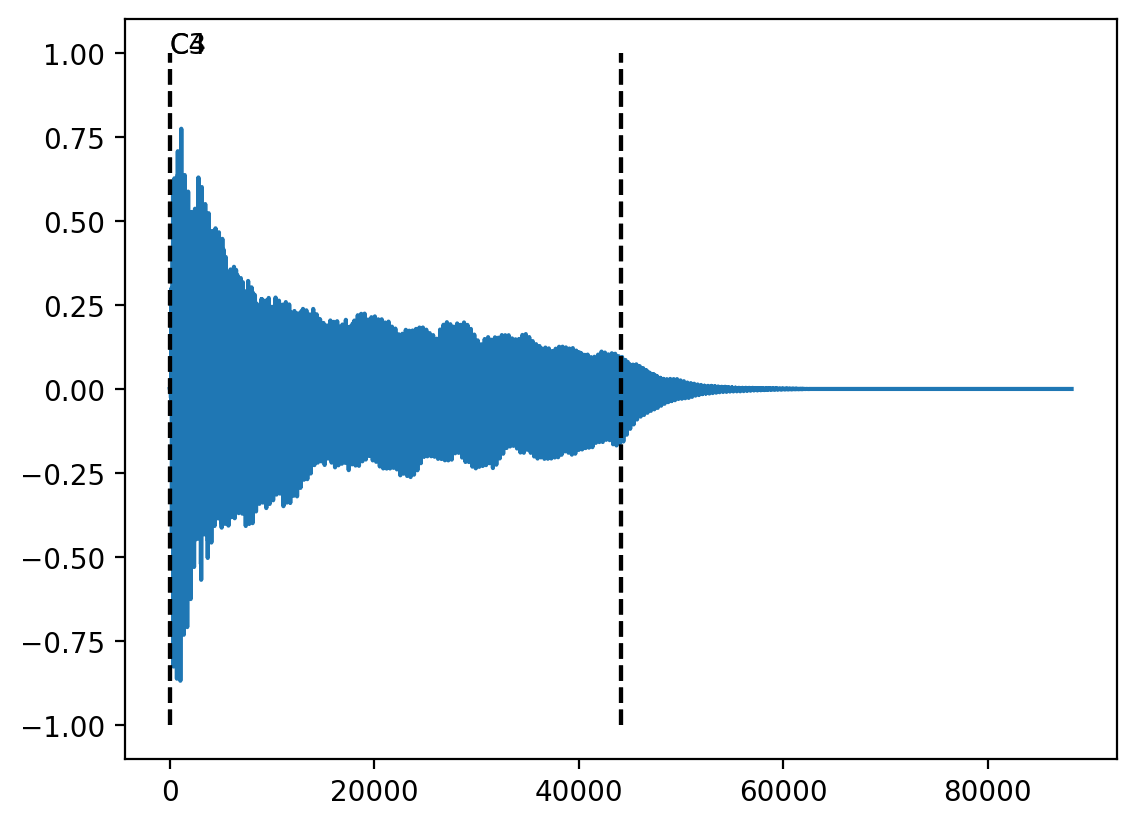

In [ ]:
plt.plot(y)
for i, (o, d, n) in enumerate(zip(offsets, durations, notes)):
    plt.text(o*sr, 1 - 0.1*len([x for x in in offsets[:i] if x == o]), note.Note(n+8).nameWithOctave)
    plt.vlines(o*sr, -1, 1, "k", "--")
    plt.vlines((o+d)*sr, -1, 1, "k", "--")
len(y)

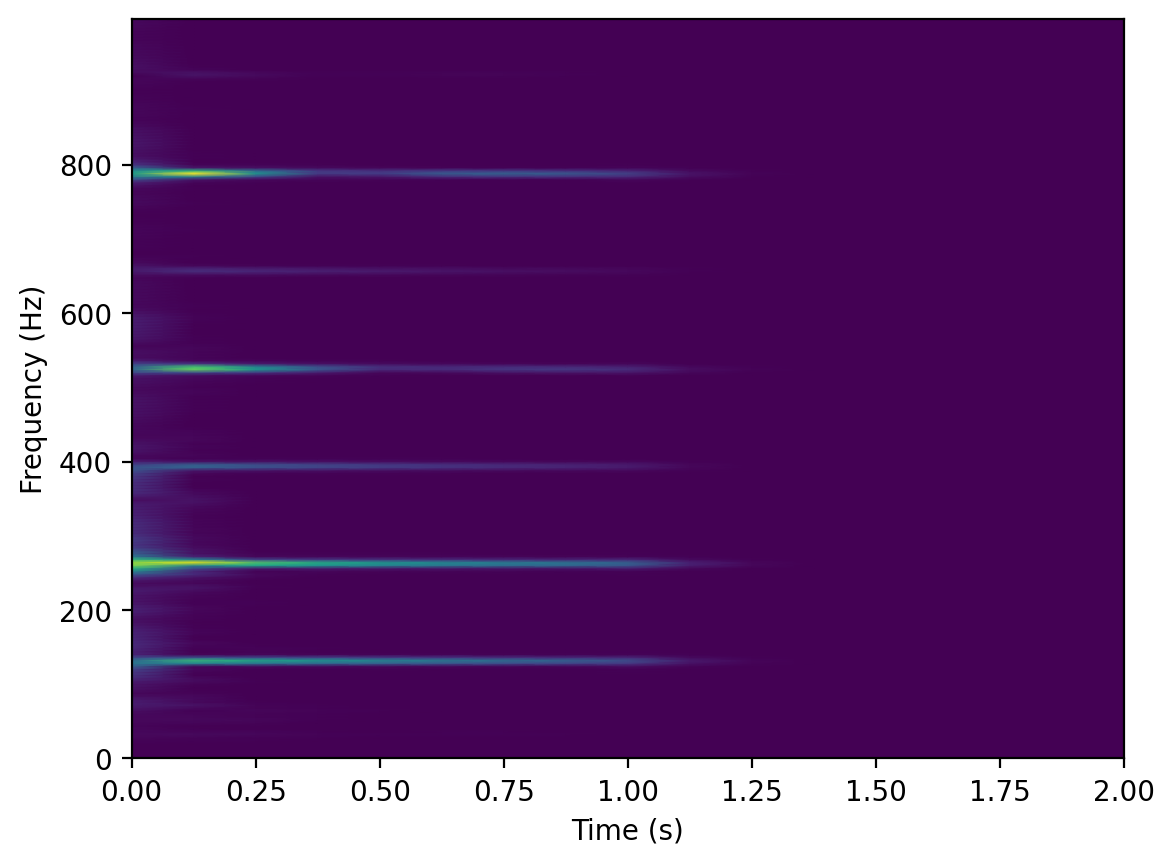

In [ ]:
f, t, Zxx = stft(y, fs=sr, nperseg=int(sr/(beat/60)/8), noverlap=int(sr/(beat/60)/8/1.5))
fig, ax = plt.subplots()
cut = 1000
Zxx = Zxx[f<cut, :]
f = f[f<cut]
ax.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=np.max(np.abs(Zxx)), shading="gouraud")
ax.set_yscale('linear')
ax.set_xlabel("Time (s)")
_ = ax.set_ylabel("Frequency (Hz)")

(0.0, 2000.0)

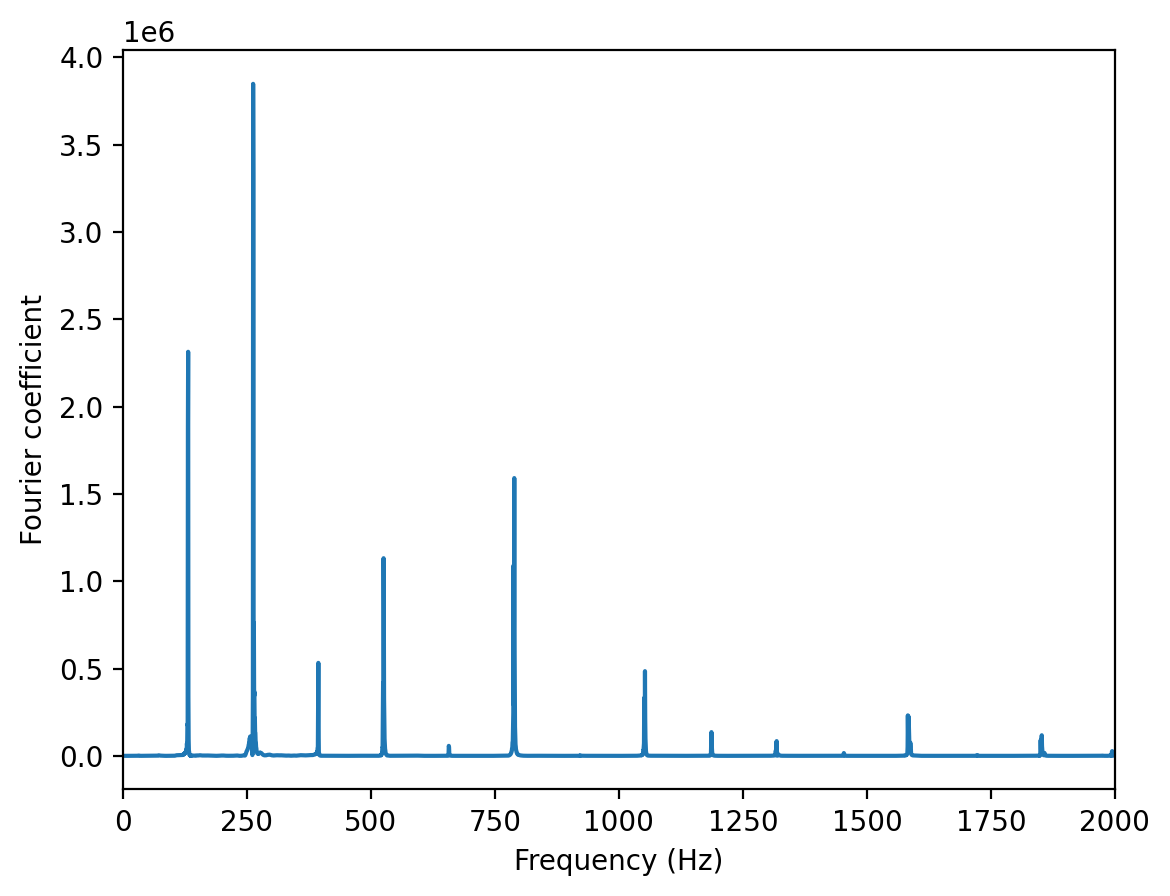

In [179]:
fourier = abs(rfft(y)) ** 2
freqs = rfftfreq(n=len(y), d=1.0 / sr)

fig, ax = plt.subplots()
ax.plot(freqs, fourier)
ax.set_xlabel("Frequency (Hz)")
ax.set_ylabel("Fourier coefficient")
ax.set_xlim([0, 2000])